In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pickle
from SPCA import helpers
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline


In [2]:
# Set the mainpath, planets, channels, path, and other variables
rootpath = '/home/ldang05/projects/def-ncowan/ldang05/Spitzer_Data/'
planets = ['KELT-20b']
channels = ['ch2']
mainpath = rootpath + planets[0] + '/analysis/' + channels[0] + '/addedBlank/noIgnore/'

# Example usage
rows = ['v1_TruePSFW', 'v1_PSFW_TruePSFW', 'v2_TruePSFW', 'v2_PSFW_TruePSFW']
cols = ['Poly2', 'Poly3', 'Poly4', 'Poly5', 'BLISS', 'PLDAper1_3x3', 'PLDAper1_5x5']


mode_list = []
for mode_c in cols:
    for mode_r in rows:
        mode_cat = mode_c + '_' + mode_r
        mode_list.append(mode_cat)

In [11]:
def get_bic_values_dict(path):

    contents = os.listdir(path)

    bic_values_dict = {}

    # Iterate through the contents and print their names
    for dir_4um in contents:
        dir_path = os.path.join(path, dir_4um)
        mode_folders = os.listdir(dir_path)

        for mode_folder in mode_folders:
            if mode_folder in mode_list:
                mode_path = os.path.join(dir_path, mode_folder)

                evidence_file = glob.glob(os.path.join(mode_path, 'EVIDENCE_*.txt'))[0]
                with open(evidence_file, 'r') as file:
                    evidence = file.read()
                    evidence_lines = evidence.split('\n')
                    last_line = evidence_lines[-1]
                    words = last_line.split()
                    bic = float(words[-1])
                    bic_values_dict[mode_folder] = bic

    return bic_values_dict

def assign_colors_to_bic(bic_values_dict):
    bic_values = list(bic_values_dict.values())

    # Create a colormap that goes from light to dark red
    # cmap = LinearSegmentedColormap.from_list('custom_red', [(1, 0, 0, 0), (1, 0, 0, 0.5)], N=256)
    cmap = LinearSegmentedColormap.from_list('custom_rosybrown', [(0.737, 0.561, 0.561, 0), (0.737, 0.561, 0.561, 0.8)], N=256)
    
    # Normalize BIC values to [0, 1] for colormap
    norm = plt.Normalize(min(bic_values), max(bic_values))
    
    # Map BIC values to colors
    colors = cmap(norm(bic_values))
    
    # Create a dictionary that maps subplot names to their colors
    bic_colors_dict = {subplot_name: color for subplot_name, color in zip(bic_values_dict.keys(), colors)}
    
    return bic_colors_dict

bic_values_dict = get_bic_values_dict(mainpath)
print('bic_values_dict is ', bic_values_dict)
bic_colors_dict = assign_colors_to_bic(bic_values_dict)
colors = list((assign_colors_to_bic(bic_values_dict)).values())

# fig, ax = plt.subplots(figsize=(15, 2))
# cax = ax.imshow([bic_values], cmap=cmap, aspect='auto')
# plt.colorbar(cax, orientation='horizontal', label='BIC Value', pad=0.3)
# plt.show()


bic_values_dict is  {'Poly5_v2_TruePSFW': -2797918.3768216595, 'BLISS_v1_PSFW_TruePSFW': -2825359.012633031, 'Poly5_v1_PSFW_TruePSFW': -2798215.16652038, 'Poly4_v1_PSFW_TruePSFW': -2778432.5031481925, 'Poly4_v1_TruePSFW': -2780580.8139418373, 'Poly2_v1_TruePSFW': -2682651.8641859903, 'Poly2_v1_PSFW_TruePSFW': -2678796.289591258, 'Poly3_v2_TruePSFW': -2718853.379858404, 'Poly3_v1_PSFW_TruePSFW': -2709539.8688871856, 'BLISS_v2_TruePSFW': -2781930.843980743, 'Poly3_v1_TruePSFW': -2710758.193623078, 'Poly5_v2_PSFW_TruePSFW': -2797120.181838846, 'BLISS_v1_TruePSFW': -2810372.9749321076, 'Poly4_v2_PSFW_TruePSFW': -2797633.4185953233, 'Poly2_v2_TruePSFW': -2682563.607336362, 'Poly4_v2_TruePSFW': -2794620.8273757272, 'Poly2_v2_PSFW_TruePSFW': -2687642.199323758, 'Poly3_v2_PSFW_TruePSFW': -2714653.7309615756, 'Poly5_v1_TruePSFW': -2793725.8374470156, 'PLDAper1_3x3_v1_TruePSFW': -2726657.075352424, 'PLDAper1_3x3_v2_PSFW_TruePSFW': -2741262.792128318, 'PLDAper1_3x3_v1_PSFW_TruePSFW': -2723293.772

Mode Poly5_v2_TruePSFW plotted
Mode BLISS_v1_PSFW_TruePSFW plotted
Mode Poly5_v1_PSFW_TruePSFW plotted
Mode Poly4_v1_PSFW_TruePSFW plotted
Mode Poly4_v1_TruePSFW plotted
Mode Poly2_v1_TruePSFW plotted
Mode Poly2_v1_PSFW_TruePSFW plotted
Mode Poly3_v2_TruePSFW plotted
Mode Poly3_v1_PSFW_TruePSFW plotted
Mode BLISS_v2_TruePSFW plotted
Mode Poly3_v1_TruePSFW plotted
Mode Poly5_v2_PSFW_TruePSFW plotted
Mode BLISS_v1_TruePSFW plotted
Mode Poly4_v2_PSFW_TruePSFW plotted
Mode Poly2_v2_TruePSFW plotted
Mode Poly4_v2_TruePSFW plotted
Mode Poly2_v2_PSFW_TruePSFW plotted
Mode Poly3_v2_PSFW_TruePSFW plotted
Mode Poly5_v1_TruePSFW plotted
Mode PLDAper1_3x3_v1_TruePSFW plotted
Mode PLDAper1_3x3_v2_PSFW_TruePSFW plotted
Mode PLDAper1_3x3_v1_PSFW_TruePSFW plotted
Mode PLDAper1_3x3_v2_TruePSFW plotted
Mode PLDAper1_5x5_v1_TruePSFW plotted
Mode PLDAper1_5x5_v2_PSFW_TruePSFW plotted
Mode PLDAper1_5x5_v2_TruePSFW plotted
Mode PLDAper1_5x5_v1_PSFW_TruePSFW plotted
Modes not found in mode_folder: BLISS_v2_P

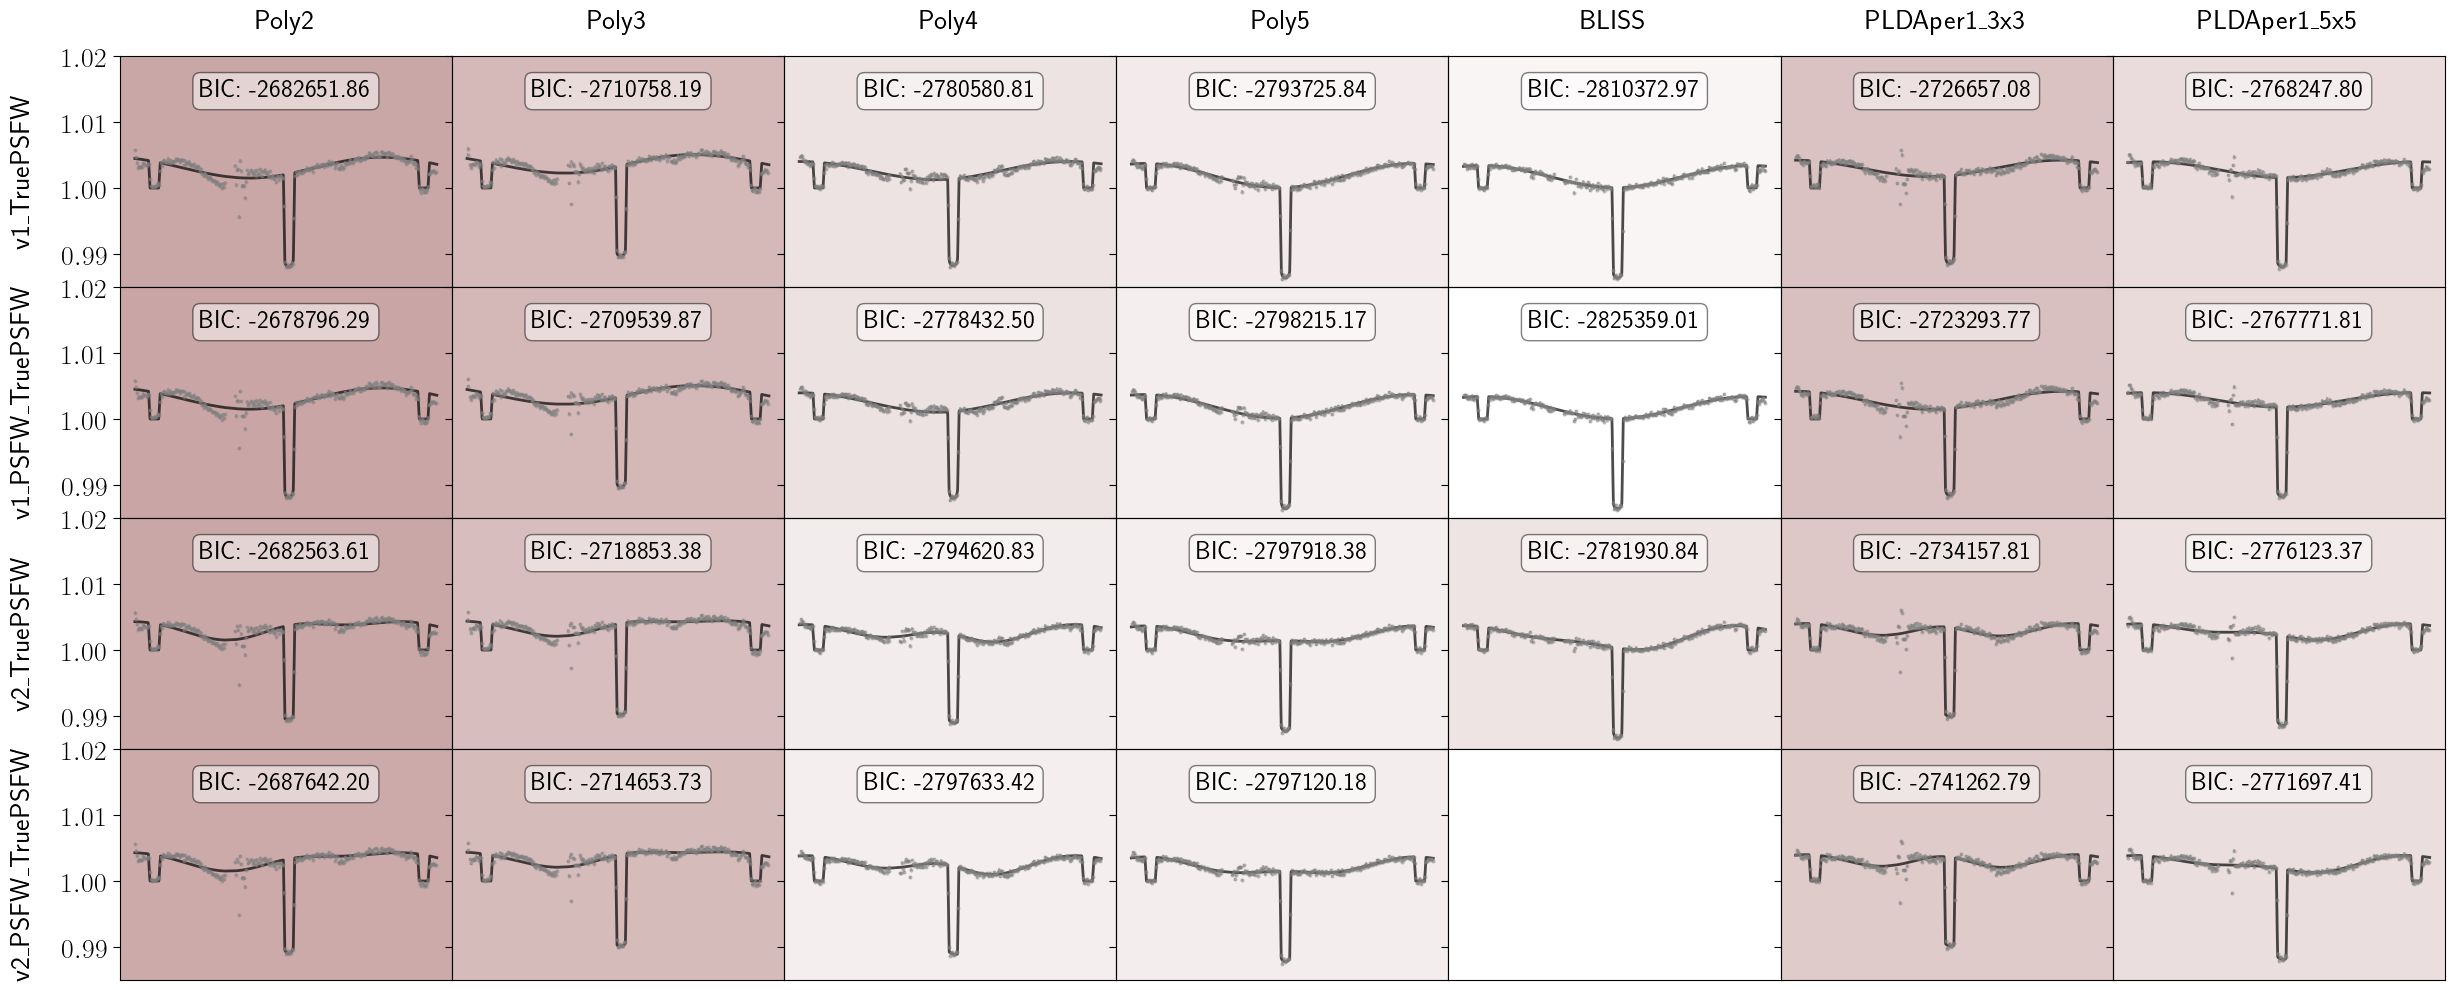

In [13]:
mintime = 8536.0+2450000.5 # 56417.2414096537
maxtime = 8539.8+2450000.5 # 56420.8356839537

minflux = 0.985
maxflux = 1.02

# Define the create_subplot_names function here (as provided earlier)

subplot_names = {}

def create_subplot_names(rows, cols):
    # Create a dictionary to store subplot axes and their names

    # Create subplots with increased spacing
    fig, axes = plt.subplots(nrows=len(rows), ncols=len(cols), sharex=True, sharey=True, figsize=(30, len(rows) * 3))

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0, hspace=0)  # Adjust the values as needed
    plt.ylim(minflux, maxflux)

    # Iterate through rows and columns to name the subplots
    for i, row in enumerate(rows):
        for j, col in enumerate(cols):
            subplot_name = f"{col}_{row}"  # Switched order to col_row
            ax = axes[i, j]
            subplot_names[subplot_name] = ax

            # Set the title in the middle of each subplot
            # ax.set_title(subplot_name, fontsize=15, x=0.5, y=0.5, loc="center")  # Adjust the fontsize as needed

            # Set row names as labels for y axes for the first column
            if j == 0:
                ax.set_ylabel(row, fontsize=20, labelpad=20)  # Row name as y-axis label

    # Set column names at the top of the subplot (not as titles)
    for j, col in enumerate(cols):
        ax = axes[0, j]  # Access the top row of subplots
        ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
        ax.set_xlabel(col, fontsize=20, labelpad=20)  # Column name as x-axis label

    return fig, subplot_names

def plot_model(time, flux, astro, detec, breaks, 
               axName=None, bic=None,
               savepath=None, plotName='Combined_plot.pdf', plotTrueAnomaly=False, nbin=None, fontsize=20):
    
    mcmc_signal = astro * detec
    
    if plotTrueAnomaly:
        x = time
    else:
        x = time - 5e4
    
    if nbin is not None:
        x_binned, _ = helpers.binValues(x, x, nbin)
        calibrated_binned, calibrated_binned_err = helpers.binValues(flux / detec, x, nbin, assumeWhiteNoise=True)
        residuals_binned, residuals_binned_err = helpers.binValues(flux / detec - astro, x, nbin, assumeWhiteNoise=True)
    
    # fig, axes = plt.subplots()
    axes = subplot_dict[axName]
    print('Mode {} plotted'.format(axName))

    # axes.plot(x, flux / detec, '.', color='k', markersize=4, alpha=0.15)
    axes.plot(x, astro, color='k', linewidth=2, alpha=0.7)
    if nbin is not None:
        axes.errorbar(x_binned, calibrated_binned, yerr=calibrated_binned_err, fmt='.',
                      color='grey', markersize=4, alpha=0.4)

    if bic is not None:
        axes.text(0.5, 0.80, f"BIC: {bic:.2f}", transform=axes.transAxes,
                  fontsize=18, ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
    
    return axes # x, astro, x_binned, calibrated_binned
    
fig, subplot_dict = create_subplot_names(rows, cols)
found_modes = set()

# List all files and directories in the specified path
contents = os.listdir(mainpath)

# Iterate through the contents and print their names
for dir_4um in contents:
    dir_path = os.path.join(mainpath, dir_4um)
    mode_folders = os.listdir(dir_path)

    for mode_folder in mode_folders:
        if mode_folder in mode_list:
            found_modes.add(mode_folder)
            mode_path = os.path.join(dir_path, mode_folder)
            bestfit_file = glob.glob(os.path.join(mode_path, 'Bestfit_*.pkl'))[0]
            
            with open(bestfit_file, 'rb') as file:
                bestfit_data = pickle.load(file)

            # Extract data from loaded_data
            time = bestfit_data[1]
            flux = bestfit_data[2]
            astro = bestfit_data[3]
            detec = bestfit_data[4]
            breaks = bestfit_data[5]

            bic = bic_values_dict[mode_folder]
            background_colors = bic_colors_dict[mode_folder]
                
            axes = plot_model(time, flux, astro, detec, breaks, axName=mode_folder, nbin=300, bic=bic)
            axes.set_xticks([])  # Hide x-axis ticks and values
            axes.set_facecolor(background_colors)

    # Save the figure to a PDF file
    plt.savefig('combined_plot.pdf', bbox_inches='tight')

not_found_modes = set(mode_list) - found_modes
print('Modes not found in mode_folder:', ' '.join(not_found_modes))

<Figure size 640x480 with 0 Axes>